In [1]:
import pandas as pd
import numpy as np

In [2]:
df_test = pd.read_csv("D:\\Data Science\\kaggle\\titanic kaggle\\test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df_test.shape

(418, 11)

In [4]:
df_test = df_test.drop(columns=['Name','Ticket','Cabin'])
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [5]:
df_test.shape

(418, 8)

In [6]:
df_test.duplicated().sum()

0

In [8]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

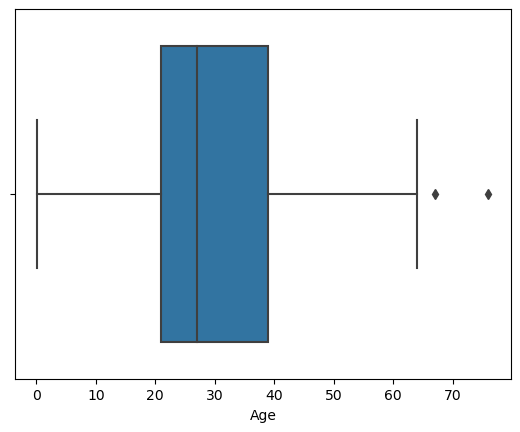

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df_test['Age'])
plt.show()

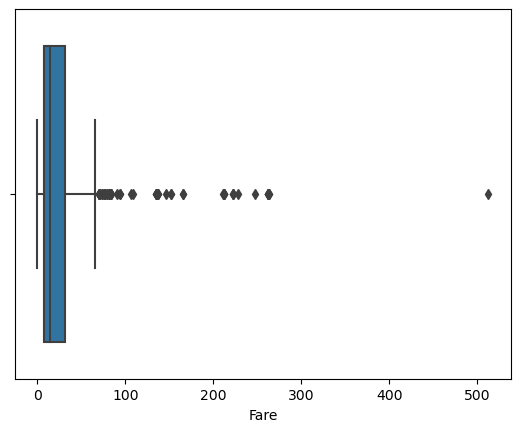

In [13]:
sns.boxplot(x=df_test['Fare'])
plt.show()

In [14]:
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(),inplace=True)

In [15]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [16]:
df_test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [17]:
df_test['Pclass'].skew()

-0.5341703482345055

In [18]:
df_test['Age'].skew()

0.6607470412147504

In [19]:
df_test['SibSp'].skew()

4.168336568562722

In [20]:
df_test['Parch'].skew()

4.654461698299236

In [24]:
df_test['Fare'].skew()

3.6922987243405156

In [21]:
from scipy import stats
df_test['SibSp_boxcox'],param = stats.boxcox(df_test.SibSp+0.01)
df_test['SibSp_boxcox'].skew()

0.7615994954631143

In [22]:
df_test['Parch_boxcox'],param = stats.boxcox(df_test.Parch+0.01)
df_test['Parch_boxcox'].skew()

1.3228328820583866

In [25]:
df_test['Fare_boxcox'],param = stats.boxcox(df_test.Fare+0.01)
df_test['Fare_boxcox'].skew()

0.10962532236494958

In [26]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SibSp_boxcox,Parch_boxcox,Fare_boxcox
0,892,3,male,34.5,0,0,7.8292,Q,-16.886222,-53.231633,2.190775
1,893,3,female,47.0,1,0,7.0000,S,0.009927,-53.231633,2.064803
2,894,2,male,62.0,0,0,9.6875,Q,-16.886222,-53.231633,2.432803
3,895,3,male,27.0,0,0,8.6625,S,-16.886222,-53.231633,2.305325
4,896,3,female,22.0,1,1,12.2875,S,0.009927,0.009910,2.706693


In [27]:
df_test.drop(columns=['SibSp','Parch','Fare'],inplace=True)
df_test.head()

,PassengerId,Pclass,Sex,Age,Embarked,SibSp_boxcox,Parch_boxcox,Fare_boxcox
0,892,3,male,34.5,Q,-16.886222,-53.231633,2.190775
1,893,3,female,47.0,S,0.009927,-53.231633,2.064803
2,894,2,male,62.0,Q,-16.886222,-53.231633,2.432803
3,895,3,male,27.0,S,-16.886222,-53.231633,2.305325
4,896,3,female,22.0,S,0.009927,0.009910,2.706693


In [28]:
enc_embark = pd.get_dummies(df_test['Embarked'],drop_first = True)
df_test = pd.concat([df_test,enc_embark],axis=1)
df_test.drop('Embarked',axis=1,inplace=True)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp_boxcox,Parch_boxcox,Fare_boxcox,Q,S
0,892,3,male,34.5,-16.886222,-53.231633,2.190775,1,0
1,893,3,female,47.0,0.009927,-53.231633,2.064803,0,1
2,894,2,male,62.0,-16.886222,-53.231633,2.432803,1,0
3,895,3,male,27.0,-16.886222,-53.231633,2.305325,0,1
4,896,3,female,22.0,0.009927,0.009910,2.706693,0,1


In [29]:
enc_sex = pd.get_dummies(df_test['Sex'],drop_first = True)
df_test = pd.concat([df_test,enc_sex],axis=1)
df_test.drop('Sex',axis=1,inplace=True)
df_test.head()

,PassengerId,Pclass,Age,SibSp_boxcox,Parch_boxcox,Fare_boxcox,Q,S,male
0,892,3,34.5,-16.886222,-53.231633,2.190775,1,0,1
1,893,3,47.0,0.009927,-53.231633,2.064803,0,1,0
2,894,2,62.0,-16.886222,-53.231633,2.432803,1,0,1
3,895,3,27.0,-16.886222,-53.231633,2.305325,0,1,1
4,896,3,22.0,0.009927,0.009910,2.706693,0,1,0


In [30]:
df_test['SibSp']=df_test['SibSp_boxcox']
df_test['Parch'] = df_test['Parch_boxcox']
df_test['Fare'] = df_test['Fare_boxcox']
df_test.drop(columns = ['SibSp_boxcox','Parch_boxcox','Fare_boxcox'],inplace=True)
df_test.head()

,PassengerId,Pclass,Age,Q,S,male,SibSp,Parch,Fare
0,892,3,34.5,1,0,1,-16.886222,-53.231633,2.190775
1,893,3,47.0,0,1,0,0.009927,-53.231633,2.064803
2,894,2,62.0,1,0,1,-16.886222,-53.231633,2.432803
3,895,3,27.0,0,1,1,-16.886222,-53.231633,2.305325
4,896,3,22.0,0,1,0,0.009927,0.009910,2.706693


In [31]:
df_test.drop('Pclass',inplace=True,axis=1)

In [32]:
df_test= df_test[['PassengerId','male','Age','SibSp','Parch','Fare','Q','S']]
df_test.head()

,PassengerId,male,Age,SibSp,Parch,Fare,Q,S
0,892,1,34.5,-16.886222,-53.231633,2.190775,1,0
1,893,0,47.0,0.009927,-53.231633,2.064803,0,1
2,894,1,62.0,-16.886222,-53.231633,2.432803,1,0
3,895,1,27.0,-16.886222,-53.231633,2.305325,0,1
4,896,0,22.0,0.009927,0.009910,2.706693,0,1


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_test['Age']=sc.fit_transform(df_test[['Age']])

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_test['Parch']=sc.fit_transform(df_test[['Parch']])
df_test.head()

,PassengerId,male,Age,SibSp,Parch,Fare,Q,S
0,892,1,0.386231,-16.886222,0.000000,2.190775,1,0
1,893,0,1.371370,0.009927,0.000000,2.064803,0,1
2,894,1,2.553537,-16.886222,0.000000,2.432803,1,0
3,895,1,-0.204852,-16.886222,0.000000,2.305325,0,1
4,896,0,-0.598908,0.009927,0.981505,2.706693,0,1
